In [46]:
#importiamo le librerie di base
import numpy as np 
import pandas as pd 
import librosa.display  # questa sereve per la rappresentazione grafica e gestione di file audio
import matplotlib.pyplot as plt  # serve per calcoli matematic 

In [47]:
#importiamo il dataset
music_data = pd.read_csv('Data/features_30_sec.csv') 
music_data_3sec = pd.read_csv('Data/features_3_sec.csv') 

music_data.head(5) #per vedere le prime 5 colonne del dataset



,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [48]:
music_data['label'].value_counts() # andiamo a vedere il n° di dati e tipologia per ogni genere

label
blues        100
classical    100
country      100
disco        100
hiphop       100
jazz         100
metal        100
pop          100
reggae       100
rock         100
Name: count, dtype: int64

In [49]:
music_data_3sec['label'].value_counts() # andiamo a vedere il n° di dati e tipologia per ogni genere

label
blues        1000
jazz         1000
metal        1000
pop          1000
reggae       1000
disco         999
classical     998
hiphop        998
rock          998
country       997
Name: count, dtype: int64

Blue


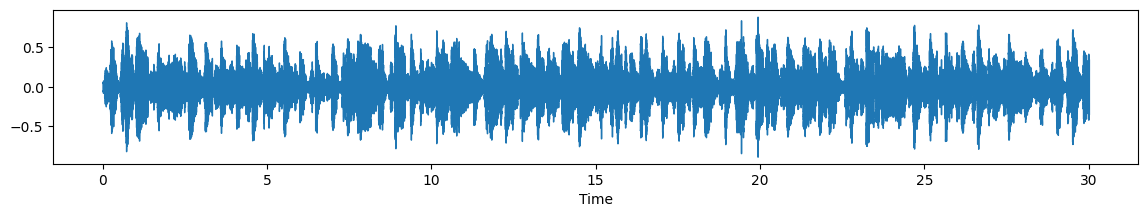

In [50]:
#Stampo la struttura del file audio medio del genere BLUES
path = 'Data/genres_original/blues/blues.00000.wav' 
plt.figure(figsize=(14, 2)) 
x, sr = librosa.load(path) 
librosa.display.waveshow(x, sr=sr) 
  
print("Blue")

In [51]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
music_data['label'] = label_encoder.fit_transform(music_data['label'])

music_data_3sec['label'] = label_encoder.fit_transform(music_data_3sec['label'])

In [52]:
X = music_data.drop(['label','filename'],axis=1) 
y = music_data['label']

X_3sec = music_data_3sec.drop(['label','filename'],axis=1) 
y_3sec = music_data_3sec['label']

In [53]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MaxAbsScaler, QuantileTransformer, PowerTransformer

# Creazione di un DataFrame di esempio


# Standardizzazione
scaler = StandardScaler()
data_standardized = scaler.fit_transform(X)

# Robust Scaler
robust_scaler = RobustScaler()
data_robust_scaled = robust_scaler.fit_transform(X)

# MaxAbs Scaler
max_abs_scaler = MaxAbsScaler()
data_max_abs_scaled = max_abs_scaler.fit_transform(X)

# Quantile Transformation
quantile_transformer = QuantileTransformer(output_distribution='uniform')
data_quantile_scaled = quantile_transformer.fit_transform(X)


print("Standardized Data:\n", data_standardized)
print("Robust Scaled Data:\n", data_robust_scaled)
print("MaxAbs Scaled Data:\n", data_max_abs_scaled)
print("Quantile Transformed Data:\n", data_quantile_scaled)



Standardized Data:
 [[-0.13282213 -0.35013678  0.31258717 ... -0.30059734  0.60406407
  -0.51298758]
 [-0.13282213 -0.46248155  1.11757233 ... -0.40708699  0.42412706
  -0.53842129]
 [-0.13282213 -0.18422456 -0.13770124 ... -0.52729705 -0.29618888
  -0.8749539 ]
 ...
 [-0.13282213  0.65463736 -1.43198917 ... -0.63865065 -0.26361549
  -0.89060474]
 [-0.13282213 -0.19833855  0.66814351 ... -0.5114848  -0.65064889
  -0.63768256]
 [-0.13282213 -0.2483391  -0.05894495 ...  0.16033426  0.5868411
  -0.4526752 ]]
Robust Scaled Data:
 [[ 0.         -0.28406716  0.23911547 ... -0.06393215  0.50999105
  -0.28486901]
 [ 0.         -0.36289952  0.93389623 ... -0.17111348  0.36259004
  -0.3116059 ]
 [ 0.         -0.16764649 -0.14952738 ... -0.29210434 -0.22747925
  -0.66538193]
 ...
 [ 0.          0.42098323 -1.26662419 ... -0.40418121 -0.20079574
  -0.68183469]
 [ 0.         -0.17755028  0.54599529 ... -0.27618938 -0.51784622
  -0.41595316]
 [ 0.         -0.21263568 -0.08155302 ...  0.39999329  0.4

In [54]:
# è la soluzione migliore visto che abbiamo dei dati ben distribuiti
standard_scaler = StandardScaler()
X_standardized = standard_scaler.fit_transform(X)
X_standardized_3sec = standard_scaler.fit_transform(X_3sec)

In [55]:

#Effettuo l'operazione di split del data set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
X_train_3sec, X_test_3sec, y_train_3sec, y_test_3sec = train_test_split(X_standardized_3sec, y_3sec, test_size=0.3, random_state=42)
X_train_3sec.shape, X_test_3sec.shape, y_train_3sec.shape, y_test_3sec.shape


((6993, 58), (2997, 58), (6993,), (2997,))

<H2> KNN


<h3> Definizione della scelta del k Tramite Grid_Search

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Definire i possibili valori di K
param_grid = {'n_neighbors': list(range(1, 30))}

# Usare GridSearchCV per trovare il valore ottimale
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

grid_search_3sec = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search_3sec.fit(X_train_3sec, y_train_3sec)

# Miglior valore di K
print(f"Miglior valore di K: {grid_search.best_params_}")
print(f"Accuracy con il miglior K: {grid_search.best_score_}")

# Miglior valore di K 3 sec
print(f"Miglior valore di K: {grid_search_3sec.best_params_}")
print(f"Accuracy con il miglior K: {grid_search_3sec.best_score_}")

Miglior valore di K: {'n_neighbors': 1}
Accuracy con il miglior K: 0.6628571428571429
Miglior valore di K: {'n_neighbors': 1}
Accuracy con il miglior K: 0.8897444628853023


Implemento KNN

In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Inizializzare il modello KNN
knn = KNeighborsClassifier(n_neighbors=1)
knn_3sec = KNeighborsClassifier(n_neighbors=1)

# Addestrare il modello
knn_3sec.fit(X_train, y_train)
knn.fit(X_train, y_train)




# PROVO A IMPLEMENTARE E FARE MIGLIORAMENTI CON K-FOLD CROSS VALIDATION
# Implementiamo la K-Fold Cross-Validation con StratifiedKFold per preservare le proporzioni delle classi
#kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation
#kf_ = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


# Fare previsioni sul set di test
y_pred = knn.predict(X_test)
y_pred_3sec = knn_3sec.predict(X_test_3sec)



# Valutare l'accuratezza
accuracy_knn = accuracy_score(y_test, y_pred)
#print(f"KNN Accuracy: {accuracy_knn}")

accuracy_knn_3sec = accuracy_score(y_test_3sec, y_pred_3sec)
#print(f"KNN Accuracy: {accuracy_knn_3sec}")

# Calcoliamo le score di cross-validation (Accuracy)
#cv_scores = cross_val_score(knn, X_train_3sec, y_train_3sec, cv=kf, scoring='accuracy')  #-------------
#cv_scores_ = cross_val_score(knn, X_train, y_train, cv=kf_, scoring='accuracy')  #-------------

# Precision, Recall, F1-Score per classificazione multiclasse
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

precision_3sec = precision_score(y_test_3sec, y_pred_3sec, average='weighted')
recall_3sec = recall_score(y_test_3sec, y_pred_3sec, average='weighted')
f1_3sec = f1_score(y_test_3sec, y_pred_3sec, average='weighted')

print(" -------------DATASET 30 SEC ----------------")
print(f"KNN Accuracy: {accuracy_knn}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(" -------------DATASET 3 SEC ----------------")
print(f"KNN Accuracy: {accuracy_knn_3sec}")
print(f"Precision 3: {precision_3sec:.4f}")
print(f"Recall 3: {recall_3sec:.4f}")
print(f"F1-Score 3: {f1_3sec:.4f}")



#----------------


# Confusion Matrix
#conf_matrix = confusion_matrix(y_test, y_pred)
#print(f"Confusion Matrix:\n{conf_matrix}")

# Report dettagliato con Precision, Recall, F1-Score per ciascuna classe

#print("Classification Report:\n", classification_report(y_test, y_pred))


 -------------DATASET 30 SEC ----------------
KNN Accuracy: 0.68
Precision: 0.6912
Recall: 0.6800
F1-Score: 0.6820
 -------------DATASET 3 SEC ----------------
KNN Accuracy: 0.8064731398064732
Precision 3: 0.8099
Recall 3: 0.8065
F1-Score 3: 0.8072


Porvo a Migliorare KNN con K-fold

In [58]:
# PROVO A IMPLEMENTARE E FARE MIGLIORAMENTI CON K-FOLD CROSS VALIDATION
# Implementiamo la K-Fold Cross-Validation con StratifiedKFold per preservare le proporzioni delle classi
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation
kf_ = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Calcoliamo le score di cross-validation (Accuracy)
cv_scores = cross_val_score(knn, X_train_3sec, y_train_3sec, cv=kf, scoring='accuracy')  #-------------
cv_scores_ = cross_val_score(knn, X_train, y_train, cv=kf_, scoring='accuracy')  #-------------


# Stampiamo i risultati
print(" -------------DATASET 30 SEC ----------------")
print(f"K-Fold Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Accuracy: {np.mean(cv_scores)}")
print(f"Standard Deviation: {np.std(cv_scores)}")

print(" -------------DATASET 3 SEC ----------------")
print(f"K-Fold Cross-Validation Accuracy Scores: {cv_scores_}")
print(f"Mean Accuracy: {np.mean(cv_scores_)}")
print(f"Standard Deviation: {np.std(cv_scores_)}")

 -------------DATASET 30 SEC ----------------
K-Fold Cross-Validation Accuracy Scores: [0.90207291 0.89706934 0.89063617 0.88483548 0.88340486]
Mean Accuracy: 0.8916037512999783
Standard Deviation: 0.007119597592449979
 -------------DATASET 3 SEC ----------------
K-Fold Cross-Validation Accuracy Scores: [0.75714286 0.64285714 0.59285714 0.62142857 0.67142857]
Mean Accuracy: 0.6571428571428571
Standard Deviation: 0.056242913385798635


<H1>RANDOM FOREST

In [59]:
import time
import catboost as cb 
from xgboost import XGBClassifier 
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0) 
cbc = cb.CatBoostClassifier(verbose=0, eval_metric='Accuracy', loss_function='MultiClass') 
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05) 


print(" -------------DATASET 30 SEC ----------------")

for clf in (rf, xgb, cbc): 
    start = time.time() 
    clf.fit(X_train, y_train) 
    preds = clf.predict(X_test) 
    end = time.time()

    print(clf.__class__.__name__,accuracy_score(y_test, preds))
    print(clf.__class__.__name__,precision_score(y_test, preds, average='macro'))
    #print(f"Random Forest Accuracy: {accuracy_score}")
    #print("Classification Report:\n", classification_report(y_test, preds))


print(" -------------DATASET 3 SEC ----------------")

for clf in (rf, xgb, cbc): 
    start = time.time() 
    clf.fit(X_train_3sec, y_train_3sec) 
    preds_3sec = clf.predict(X_test_3sec) 
    end = time.time()

    print(clf.__class__.__name__,accuracy_score(y_test_3sec, preds_3sec))
    print(clf.__class__.__name__,precision_score(y_test_3sec, preds_3sec, average='macro'))
    

 -------------DATASET 30 SEC ----------------
RandomForestClassifier 0.7366666666666667
RandomForestClassifier 0.7498736327287332
XGBClassifier 0.7366666666666667
XGBClassifier 0.7416375837112141
CatBoostClassifier 0.7933333333333333
CatBoostClassifier 0.801400178512603
 -------------DATASET 3 SEC ----------------
RandomForestClassifier 0.8131464798131465
RandomForestClassifier 0.8144316587493936
XGBClassifier 0.9069069069069069
XGBClassifier 0.9067813786795493
CatBoostClassifier 0.9099099099099099
CatBoostClassifier 0.9095304623348828


Proviamo Ad Applicare la Corss validation 

In [60]:
from sklearn.model_selection import cross_val_score


print(" -------------DATASET 30 SEC ----------------")
# Cross-validation per RandomForest
cv_scores_rf = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')
print(f"Random Forest CV Accuracy: {cv_scores_rf.mean()}")

# Cross-validation per CatBoost
cv_scores_catboost = cross_val_score(cbc, X_train, y_train, cv=5, scoring='accuracy')
print(f"CatBoost CV Accuracy: {cv_scores_catboost.mean()}")

# Cross-validation per XGBoost
cv_scores_xgb = cross_val_score(xgb, X_train, y_train, cv=5, scoring='accuracy')
print(f"XGBoost CV Accuracy: {cv_scores_xgb.mean()}")

print(" -------------DATASET 3 SEC ----------------")
# Cross-validation per RandomForest
cv_scores_rf = cross_val_score(rf, X_train_3sec, y_train_3sec, cv=5, scoring='accuracy')
print(f"Random Forest CV Accuracy: {cv_scores_rf.mean()}")

# Cross-validation per CatBoost
cv_scores_catboost = cross_val_score(cbc, X_train_3sec, y_train_3sec, cv=5, scoring='accuracy')
print(f"CatBoost CV Accuracy: {cv_scores_catboost.mean()}")

# Cross-validation per XGBoost
cv_scores_xgb = cross_val_score(xgb, X_train_3sec, y_train_3sec, cv=5, scoring='accuracy')
print(f"XGBoost CV Accuracy: {cv_scores_xgb.mean()}")

 -------------DATASET 30 SEC ----------------
Random Forest CV Accuracy: 0.7685714285714285
CatBoost CV Accuracy: 0.8
XGBoost CV Accuracy: 0.7542857142857142
 -------------DATASET 3 SEC ----------------
Random Forest CV Accuracy: 0.7953666066401405
CatBoost CV Accuracy: 0.8827399706105219
XGBoost CV Accuracy: 0.8846000771039195


<h3>Voglio far vedere tramite dei grafici per far capire i miglioramenti

Base Model Accuracy: 0.8064731398064732
K-Fold Model Accuracy: 0.8916037512999783


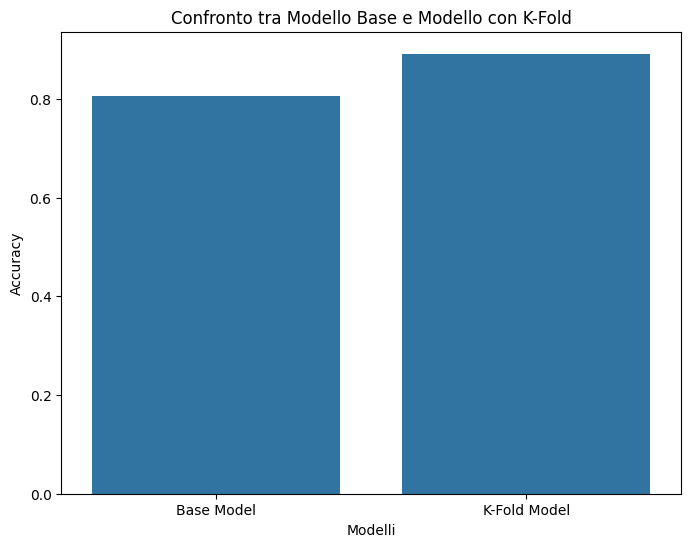

In [62]:
import seaborn as sns

# Calcola l'accuratezza del modello base
accuracy_base = accuracy_score(y_test_3sec, y_pred_3sec)
print(f"Base Model Accuracy: {accuracy_base}")


# Media delle accuratezze su tutte le fold
accuracy_kfold = cv_scores.mean()
print(f"K-Fold Model Accuracy: {accuracy_kfold}")


# Imposta i valori da visualizzare
accuracies = [accuracy_base, accuracy_kfold]
labels = ['Base Model', 'K-Fold Model']

# Crea un grafico a barre
plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=accuracies)

# Aggiungi titoli e etichette
plt.title('Confronto tra Modello Base e Modello con K-Fold')
plt.ylabel('Accuracy')
plt.xlabel('Modelli')

# Mostra il grafico
plt.show()
